# **SECTION 1**

In this part, we propose three simple examples showing how changing the optimization algorithm, then it changes the convergence of the optimization problem $min_{x\in\mathbb{R^m}}f(x,y)$, $min_{y\in\mathbb{R^m}}g(x,y)$. Many problems in competitive optimization 
(including GANs) have the form $f(x,y)=\mathbb{\phi}(\mathcal{G}(x),\mathcal{D}(y))$, $f(x,y)=\mathbb{\theta}(\mathcal{G}(x),\mathcal{D}(y))$. We will explore different modifications of Gradient Descent that take into account some additional terms. These new terms refer in some way to competition, consensus and equilibrium (we will describe them further in this section).

#### **Problem  1**
We firstly consider the problem $$min_{x\in\mathbb{R^m}}f(x,y)$$  $$min_{y\in\mathbb{R^m}}(-f(x,y))$$  
In this first case, we take $f(x,y)= \alpha xy$

Choose $\alpha \in \{ 1.0, 3.0, 6.0 \}$

In [1]:
# Importing libraries
 
import numpy as np
from optimizers.optimizers_xy import *
from optimizers.optimizers_conv_conc import *
from optimizers.optimizers_conc_conv import *
from plots import *

In [2]:
alpha = 1           # Choose alpha in (1.0, 3.0, 6.0)
Xinit = 0.5
Yinit = 0.5
max_iters = 50
eta = 0.2
gamma = 1
optimizers=['GDA','LCGD','SGA','CGD', 'OGDA']

#### 1. **Gradient Descent Ascent** (GDA)

In [3]:
objectives_GDA, xs_GDA, ys_GDA = GDA_alphaxy(Xinit, Yinit, alpha, max_iters, eta)

Gradient Descent Ascent (GDA) (0/49): objective=0.25
Gradient Descent Ascent (GDA) (1/49): objective=0.24
Gradient Descent Ascent (GDA) (2/49): objective=0.1904
Gradient Descent Ascent (GDA) (3/49): objective=0.10598400000000004
Gradient Descent Ascent (GDA) (4/49): objective=-0.002447359999999964
Gradient Descent Ascent (GDA) (5/49): objective=-0.11933122559999998
Gradient Descent Ascent (GDA) (6/49): objective=-0.226468888576
Gradient Descent Ascent (GDA) (7/49): objective=-0.30575161245696003
Gradient Descent Ascent (GDA) (8/49): objective=-0.3420943460335616
Gradient Descent Ascent (GDA) (9/49): objective=-0.3261202003509903
Gradient Descent Ascent (GDA) (10/49): objective=-0.2561415400040012
Gradient Descent Ascent (GDA) (11/49): objective=-0.13906014810805115
Gradient Descent Ascent (GDA) (12/49): objective=0.010047205300869477
Gradient Descent Ascent (GDA) (13/49): objective=0.1696980903713375
Gradient Descent Ascent (GDA) (14/49): objective=0.3149532762595476
Gradient Descent A

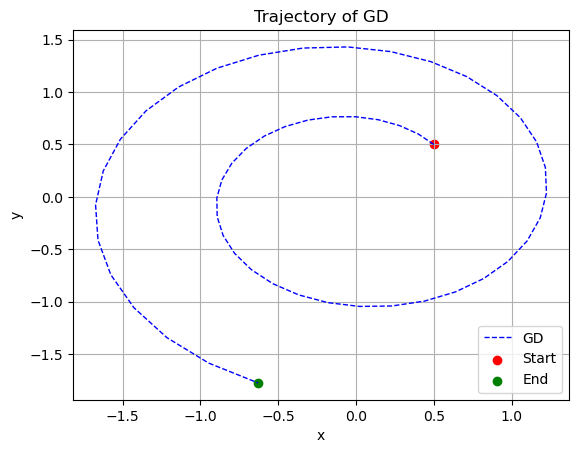

In [4]:
plot_trajectory(xs_GDA, ys_GDA, "GD")

GD fails to converge in this problem.

#### 2. **Linearized Competitive Gradient Descent** (LCGD)

In [5]:
objectives_LCGD, xs_LCGD, ys_LCGD = LCGD_alphaxy(Xinit, Yinit, alpha, max_iters, eta)

Linearized Competitive Gradient Descent (LCDG) (0/49): objective=0.25
Linearized Competitive Gradient Descent (LCDG) (1/49): objective=0.22040000000000004
Linearized Competitive Gradient Descent (LCDG) (2/49): objective=0.15744064
Linearized Competitive Gradient Descent (LCDG) (3/49): objective=0.07380106342399997
Linearized Competitive Gradient Descent (LCDG) (4/49): objective=-0.015455319488921638
Linearized Competitive Gradient Descent (LCDG) (5/49): objective=-0.09549278517198591
Linearized Competitive Gradient Descent (LCDG) (6/49): objective=-0.1540817380671675
Linearized Competitive Gradient Descent (LCDG) (7/49): objective=-0.18337717144794916
Linearized Competitive Gradient Descent (LCDG) (8/49): objective=-0.18085516534573062
Linearized Competitive Gradient Descent (LCDG) (9/49): objective=-0.1493196222149152
Linearized Competitive Gradient Descent (LCDG) (10/49): objective=-0.09604818744954784
Linearized Competitive Gradient Descent (LCDG) (11/49): objective=-0.0312801081400

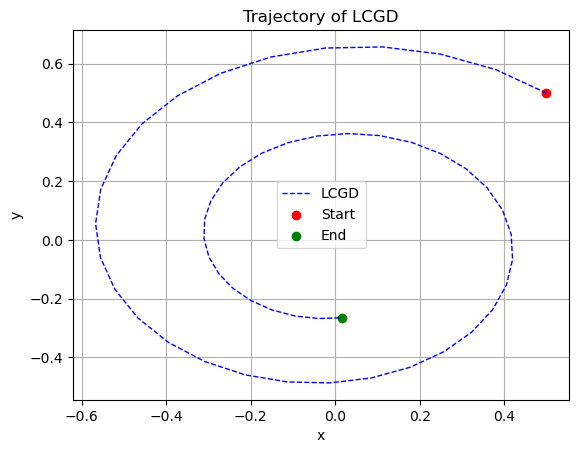

In [6]:
plot_trajectory(xs_LCGD, ys_LCGD, "LCGD")

#### 3. **Symplectic Gradient Adjustmen** (SGA)

We now train the SGA algorithm with $\eta=0.2$ and $\gamma=1$

In [7]:
objectives_SGA, xs_SGA, ys_SGA = SGA_alphaxy(Xinit, Yinit, alpha, max_iters, eta, gamma)

Symplectic Gradient Adjustment (SGA) (0/49): objective=0.25
Symplectic Gradient Adjustment (SGA) (1/49): objective=0.15
Symplectic Gradient Adjustment (SGA) (2/49): objective=0.06439999999999997
Symplectic Gradient Adjustment (SGA) (3/49): objective=0.00791999999999999
Symplectic Gradient Adjustment (SGA) (4/49): objective=-0.020274560000000004
Symplectic Gradient Adjustment (SGA) (5/49): objective=-0.02799168
Symplectic Gradient Adjustment (SGA) (6/49): objective=-0.024215059455999995
Symplectic Gradient Adjustment (SGA) (7/49): objective=-0.016114718515199994
Symplectic Gradient Adjustment (SGA) (8/49): objective=-0.008140618725785595
Symplectic Gradient Adjustment (SGA) (9/49): objective=-0.0023172966295142363
Symplectic Gradient Adjustment (SGA) (10/49): objective=0.000983466143386175
Symplectic Gradient Adjustment (SGA) (11/49): objective=0.002251677333550793
Symplectic Gradient Adjustment (SGA) (12/49): objective=0.002247258055559184
Symplectic Gradient Adjustment (SGA) (13/49): 

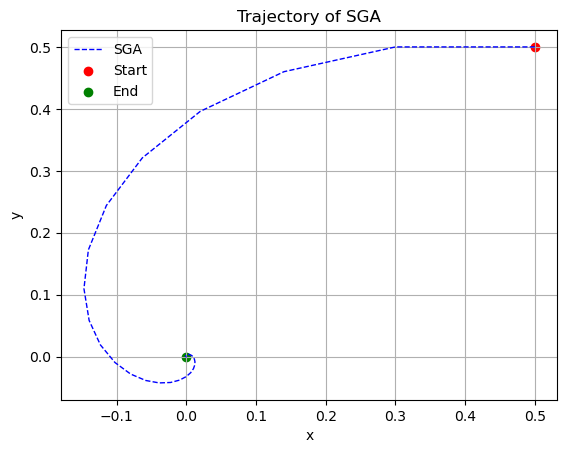

In [8]:
plot_trajectory(xs_SGA, ys_SGA, "SGA")

#### 4. **Optimistic Gradient Descent Ascent** (OGDA)

In [9]:
objectives_OGDA, xs_OGDA, ys_OGDA = OGDA_alphaxy(Xinit, Yinit, alpha, max_iters, eta)

Optimistic Gradient Descent Ascent (OGDA) (0/49): objective=0.25
Optimistic Gradient Descent Ascent (OGDA) (1/49): objective=0.21
Optimistic Gradient Descent Ascent (OGDA) (2/49): objective=0.08639999999999999
Optimistic Gradient Descent Ascent (OGDA) (3/49): objective=-0.019823999999999998
Optimistic Gradient Descent Ascent (OGDA) (4/49): objective=-0.11249215999999998
Optimistic Gradient Descent Ascent (OGDA) (5/49): objective=-0.18022717439999997
Optimistic Gradient Descent Ascent (OGDA) (6/49): objective=-0.213341879296
Optimistic Gradient Descent Ascent (OGDA) (7/49): objective=-0.20920981745664
Optimistic Gradient Descent Ascent (OGDA) (8/49): objective=-0.1715747393765376
Optimistic Gradient Descent Ascent (OGDA) (9/49): objective=-0.10926646699091558
Optimistic Gradient Descent Ascent (OGDA) (10/49): objective=-0.03437850735057043
Optimistic Gradient Descent Ascent (OGDA) (11/49): objective=0.03994844532113893
Optimistic Gradient Descent Ascent (OGDA) (12/49): objective=0.10173

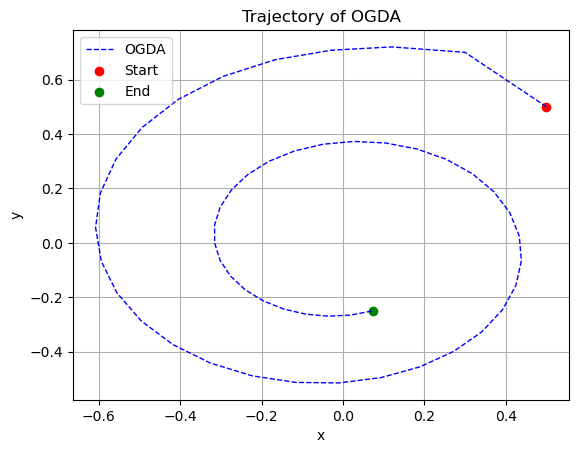

In [10]:
plot_trajectory(xs_OGDA, ys_OGDA, "OGDA")

#### 5. **Competitive Gradient Descent** (CGD)

In [11]:
objectives_CGD, xs_CGD, ys_CGD = CGD_alphaxy(Xinit, Yinit, alpha, max_iters, eta)

Competitive Gradient Descent (CGD) (0/49): objective=0.25
Competitive Gradient Descent (CGD) (1/49): objective=0.22189349112426035
Competitive Gradient Descent (CGD) (2/49): objective=0.16275471797205981
Competitive Gradient Descent (CGD) (3/49): objective=0.08376069469498383
Competitive Gradient Descent (CGD) (4/49): objective=-0.001788261980113601
Competitive Gradient Descent (CGD) (5/49): objective=-0.08061590023742783
Competitive Gradient Descent (CGD) (6/49): objective=-0.14145179962624616
Competitive Gradient Descent (CGD) (7/49): objective=-0.1765639377264837
Competitive Gradient Descent (CGD) (8/49): objective=-0.18264696820321982
Competitive Gradient Descent (CGD) (9/49): objective=-0.16098210172309393
Competitive Gradient Descent (CGD) (10/49): objective=-0.11689965523772236
Competitive Gradient Descent (CGD) (11/49): objective=-0.058677178562622986
Competitive Gradient Descent (CGD) (12/49): objective=0.003919630545013169
Competitive Gradient Descent (CGD) (13/49): objective

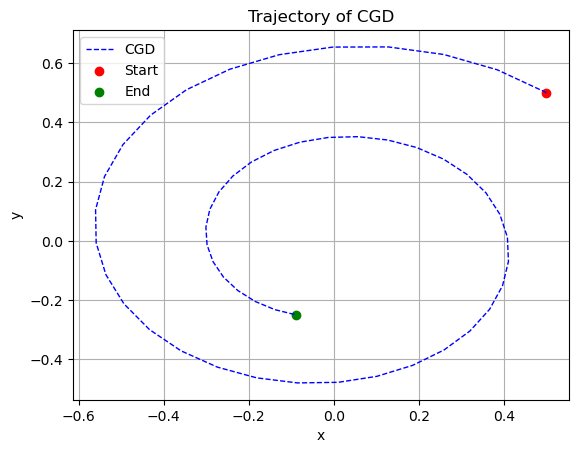

In [12]:
plot_trajectory(xs_CGD, ys_CGD, "CGD")

#### **Plotting together**

Now we want to compare the trajectories of these different 5 algorithms by plotting them in the same plot:

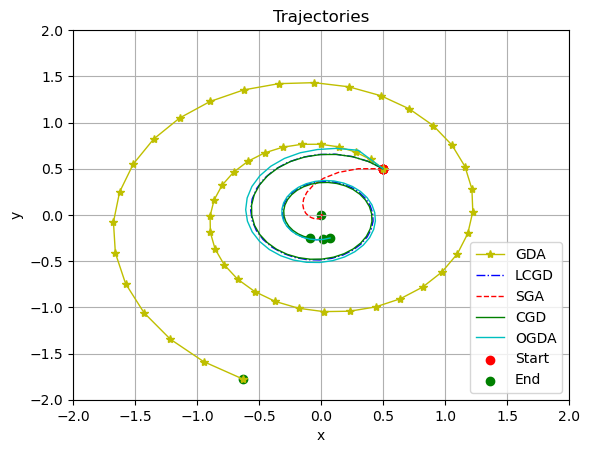

In [13]:
xs_list = [xs_GDA, xs_LCGD, xs_SGA, xs_CGD, xs_OGDA]
ys_list = [ys_GDA, ys_LCGD, ys_SGA, ys_CGD, ys_OGDA]
line_styles = ['y-*', 'b-.', 'r--', 'g-', 'c-']

plot_trajectories(optimizers, xs_list, ys_list, line_styles)

#### **Problem  2**
In this case, we take $f(x,y)= \alpha(x^2-y^2)$

In [14]:
import optimizers.optimizers_conv_conc as v_c
Xinit=0.5
Yinit=0.5
eta=0.2
gamma=1
optimizers=['GDA','LCGD','SGA','ConOpt','OGDA','CGD']

Choose $\alpha \in \{ 1.0, 3.0, 6.0 \}$


the case where $\alpha = 1.0$

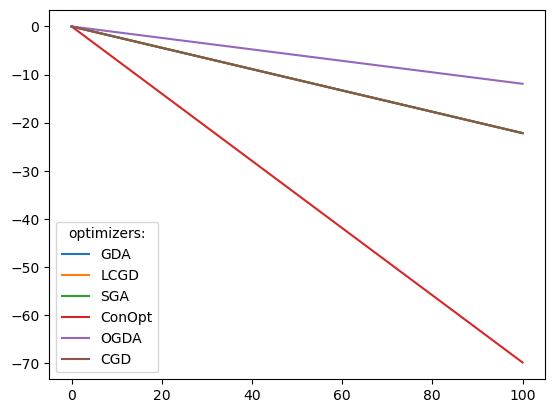

In [15]:
alpha=1
records={}
for optimizer in optimizers:
    record=v_c.run(alpha,eta,gamma,Xinit,Yinit,optimizer=optimizer)
    records[optimizer]=record

step=[i*25 for i in range(5)]
for optimizer in optimizers:
    plt.plot(step,records[optimizer],label=optimizer)
plt.legend(title='optimizers:')
plt.show()


the case where $\alpha = 3.0$

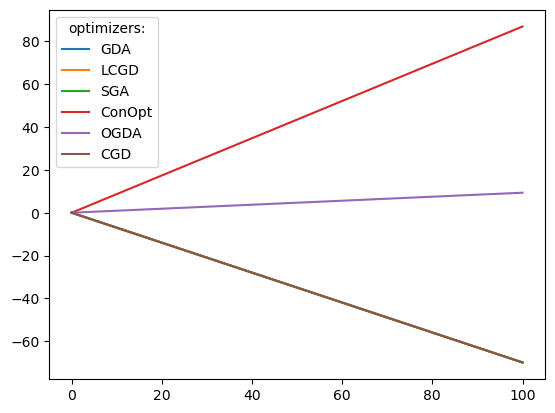

In [16]:
alpha=3
records={}
for optimizer in optimizers:
    record=v_c.run(alpha,eta,gamma,Xinit,Yinit,optimizer=optimizer)
    records[optimizer]=record

step=[i*25 for i in range(5)]
for optimizer in optimizers:
    plt.plot(step,records[optimizer],label=optimizer)
plt.legend(title='Optimizers:')
plt.show()

the case where $\alpha = 6.0$

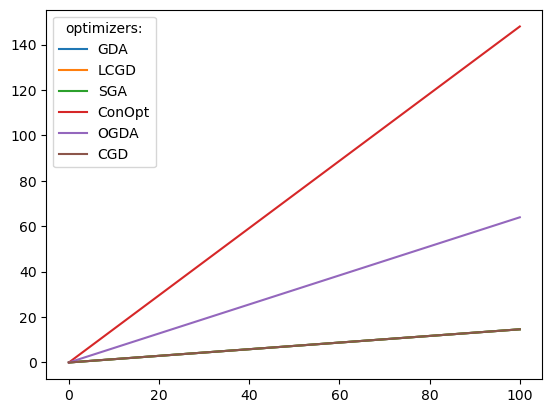

In [17]:
alpha=6
records={}
for optimizer in optimizers:
    record=v_c.run(alpha,eta,gamma,Xinit,Yinit,optimizer=optimizer)
    records[optimizer]=record

step=[i*25 for i in range(5)]
for optimizer in optimizers:
    plt.plot(step,records[optimizer],label=optimizer)
plt.legend(title='optimizers:')
plt.show()

#### **Problem  3**
In this case, we take $f(x,y)= \alpha(-x^2+y^2)$

Choose $\alpha \in \{ 1.0, 3.0, 6.0 \}$

In [18]:
import optimizers.optimizers_conc_conv as c_v

the case where $\alpha = 1.0$

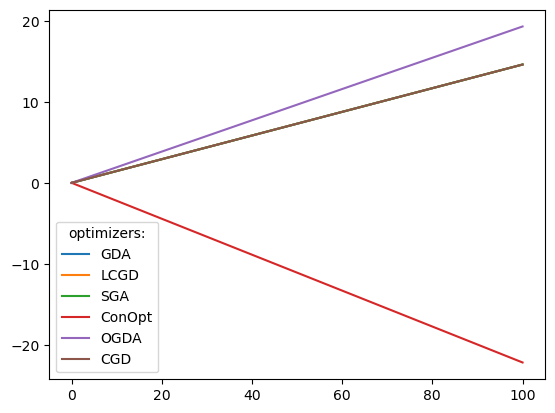

In [19]:
alpha=1
records={}
for optimizer in optimizers:
    record=c_v.run(alpha,eta,gamma,Xinit,Yinit,optimizer=optimizer)
    records[optimizer]=record

step=[i*25 for i in range(5)]
for optimizer in optimizers:
    plt.plot(step,records[optimizer],label=optimizer)
plt.legend(title='optimizers:')
plt.show()

the case where $\alpha = 3.0$

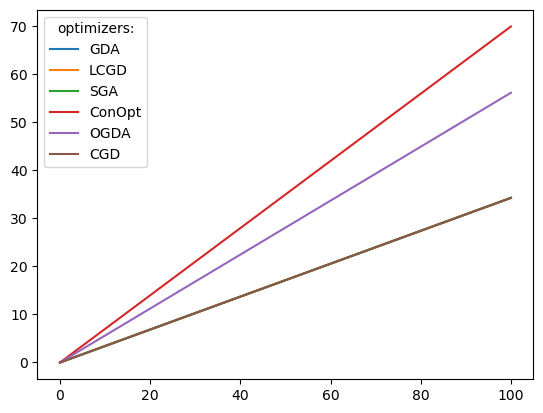

In [20]:
alpha=3
records={}
for optimizer in optimizers:
    record=c_v.run(alpha,eta,gamma,Xinit,Yinit,optimizer=optimizer)
    records[optimizer]=record

step=[i*25 for i in range(5)]
for optimizer in optimizers:
    plt.plot(step,records[optimizer],label=optimizer)
plt.legend(title='optimizers:')
plt.show()

the case where $\alpha = 6.0$

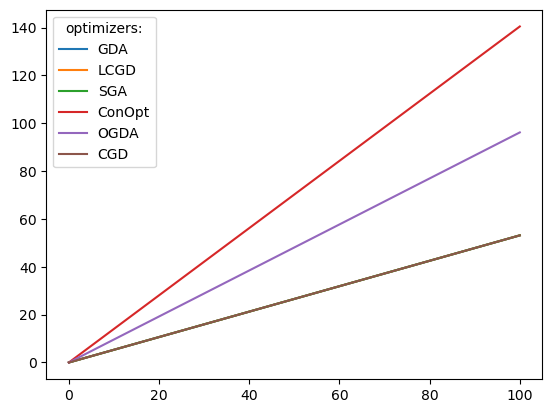

In [21]:
alpha=6
records={}
for optimizer in optimizers:
    record=c_v.run(alpha,eta,gamma,Xinit,Yinit,optimizer=optimizer)
    records[optimizer]=record

step=[i*25 for i in range(5)]
for optimizer in optimizers:
    plt.plot(step,records[optimizer],label=optimizer)
plt.legend(title='optimizers:')
plt.show()